In [46]:
using Plots
using Images
using Test, SparseArrays, LinearAlgebra
using FFTW

In [47]:
N = 5000
brain_signal = sin.(LinRange(0, 1000, N) ./ 10) .+ rand(N);

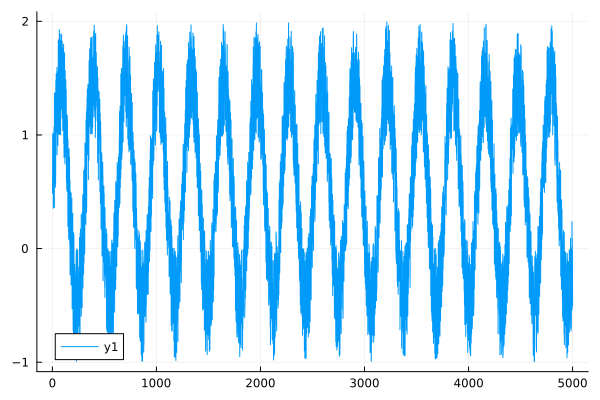

In [48]:
plot(brain_signal)

In [49]:
function ricker(x, a)
	A = 8/π/sqrt(3a)
	return A * (1 - (x/a)^2) * exp(-x^2/a^2/2)
end

ricker (generic function with 1 method)

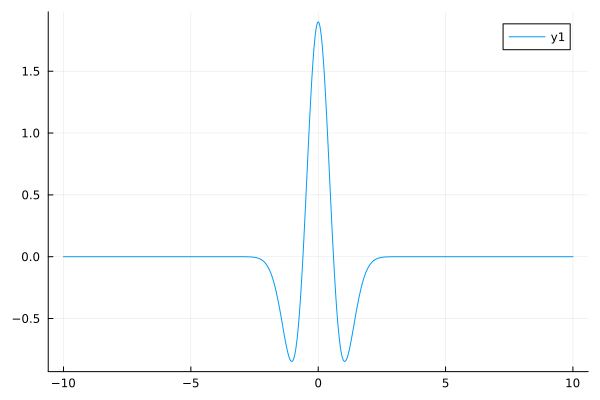

In [50]:
let
	x = -10:0.01:10
	y = ricker.(x, 0.6)
	plot(x, y)
end

In [55]:
function wavelet_transformation(signal::AbstractVector{T}, fw) where T
	# convolution is just product in fourier space
	return abs.(ifft(fft(signal).* conj(fft([fw;zeros(length(signal)-length(fw))]))))
end

wavelet_transformation (generic function with 1 method)

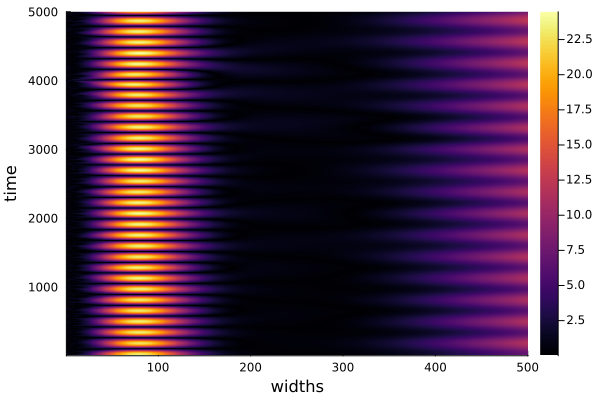

In [56]:
widths = 1:N÷10
res = []
for (j, a) in enumerate(widths)
    fw = ricker.(-1000:1000, a)   # the descretized wavelet of width `a`
    res_a = wavelet_transformation(brain_signal, fw)
    # make sure convolution is calculated correctly
    # @test res_a ≈ DSP.conv(fw,brain_signal)
    push!(res, res_a)
end
heatmap(hcat(res...); ylabel="time", xlabel="widths")